****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [3]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

# Question #1
We will first load the file and look at 3 samples of data to get an idea of how the data is assembled both as a list and as a dataframe

In [4]:
with open( 'data/world_bank_projects.json','r') as json_file:
    json_data = json.load(json_file)
json_data[0:2]

[{'sector': [{'Name': 'Primary education'},
   {'Name': 'Secondary education'},
   {'Name': 'Public administration- Other social services'},
   {'Name': 'Tertiary education'}],
  'supplementprojectflg': 'N',
  'projectfinancialtype': 'IDA',
  'prodline': 'PE',
  'mjtheme': ['Human development'],
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'project_name': 'Ethiopia General Education Quality Improvement Project II',
  'mjthemecode': '8,11',
  'closingdate': '2018-07-07T00:00:00Z',
  'totalcommamt': 130000000,
  'id': 'P129828',
  'mjsector_namecode': [{'code': 'EX', 'name': 'Education'},
   {'code': 'EX', 'name': 'Education'},
   {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
   {'code': 'EX', 'name': 'Education'}],
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'sector1': {'Percent': 46, 'Name': 'Primary education'},
  'lendinginstr': 'Investment Project Financing',
  'countrycode': 'ET',
  '

In [5]:
df = pd.read_json('data/world_bank_projects.json')
df.head(3)

_id  approvalfy board_approval_month  \
0  {'$oid': '52b213b38594d8a2be17c780'}        1999             November   
1  {'$oid': '52b213b38594d8a2be17c781'}        2015             November   
2  {'$oid': '52b213b38594d8a2be17c782'}        2014             November   

      boardapprovaldate                                 borrower  \
0  2013-11-12T00:00:00Z  FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA   
1  2013-11-04T00:00:00Z                    GOVERNMENT OF TUNISIA   
2  2013-11-01T00:00:00Z   MINISTRY OF FINANCE AND ECONOMIC DEVEL   

            closingdate                              country_namecode  \
0  2018-07-07T00:00:00Z  Federal Democratic Republic of Ethiopia!$!ET   
1                   NaN                      Republic of Tunisia!$!TN   
2                   NaN                                   Tuvalu!$!TV   

  countrycode                              countryname countryshortname  ...  \
0          ET  Federal Democratic Republic of Ethiopia         Ethiopia  ...   
1          TN                      Republic of Tunisia          Tunisia  ...   
2          TV                                   Tuvalu           Tuvalu  ...   

    sectorcode source  status  supplementprojectflg  \
0  ET,BS,ES,EP   IBRD  Active                     N   
1        BZ,BS   IBRD  Active                     N   
2           TI   IBRD  Active                     Y   

                                              theme1  \
0      {'Percent': 100, 'Name': 'Education for all'}   
1  {'Percent': 30, 'Name': 'Other economic manage...   
2    {'Percent': 46, 'Name': 'Regional integration'}   

                                      theme_namecode    themecode   totalamt  \
0      [{'code': '65', 'name': 'Education for all'}]           65  130000000   
1  [{'code': '24', 'name': 'Other economic manage...        54,24          0   
2  [{'code': '47', 'name': 'Regional integration'...  52,81,25,47    6060000   

  totalcommamt                                                url  
0    130000000  http://www.worldbank.org/projects/P129828/ethi...  
1      4700000  http://www.worldbank.org/projects/P144674?lang=en  
2      6060000  http://www.worldbank.org/projects/P145310?lang=en  

[3 rows x 50 columns]

We can find the top 10 countries with the most projects by indexing, using the value_counts() method and the head(10) method over the countryname column to create a series

In [6]:
country_counts = df.countryname.value_counts()
country_counts.head(10)

People's Republic of China         19
Republic of Indonesia              19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64

# Question 2
We now want to find the top 10 major project themes in the dataset. We can do that by creating a much smaller dataset using the json_normalize function to attain a dataframe with codes and names for theme classification.

In [7]:
df_theme = json_normalize(json_data, 'mjtheme_namecode')
df_theme.head(15)

code                                          name
0     8                             Human development
1    11                                              
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12    6         Social protection and risk management
13    6                                              
14    2                      Public sector governance

We can count the number of theme names appearing in the dataset to find the top 10 most common theme names.

In [8]:
unfilled = df_theme.name.value_counts()
top_10_u = unfilled.head(10)
top_10_u

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

# Question 3

As can be seen in Q2, there are 122 project themes that are not named. We can add names to those missing values using the respective project theme code. Adding those values can change the results.

We shall first create a dictionary with codes as keys and names as values. This dictionary can be used as a reference to fill up the empty values.

In [9]:
cn_dict = {}
codes_list =[]
names_list =[]

In [10]:
for code in df_theme.code:
    codes_list.append(code)
for name in df_theme.name:
    names_list.append(name)

In [20]:
zipped = zip(codes_list, names_list)
for code, name in zipped:
      if len(name) == 0:
            continue
      else:
        cn_dict[code] = name 
cn_dict

{'8': 'Human development',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '11': 'Environment and natural resources management',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

We have created a dictionary that references every code to a theme name.

In [21]:
df_filled = df_theme.copy()
for i in range(len(df_filled)):
     if len(df_filled.name[i]) == 0:
        df_filled.name[i] = cn_dict[df_filled.code[i]]

In [22]:
df_filled.head(15)

code                                          name
0     8                             Human development
1    11  Environment and natural resources management
2     1                           Economic management
3     6         Social protection and risk management
4     5                         Trade and integration
5     2                      Public sector governance
6    11  Environment and natural resources management
7     6         Social protection and risk management
8     7                   Social dev/gender/inclusion
9     7                   Social dev/gender/inclusion
10    5                         Trade and integration
11    4      Financial and private sector development
12    6         Social protection and risk management
13    6         Social protection and risk management
14    2                      Public sector governance

We have filled the empty names with the correct ones. We can now find a more accurate number of the top 10 major themes

In [14]:
filled = df_fill.name.value_counts()
top_10_f = filled.head(10)
top_10_f

Environment and natural resources management    250
Rural development                               216
Human development                               210
Public sector governance                        199
Social protection and risk management           168
Financial and private sector development        146
Social dev/gender/inclusion                     130
Trade and integration                            77
Urban development                                50
Economic management                              38
Name: name, dtype: int64

In [15]:
top_10_u

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [16]:
top_10_f - top_10_u

                                                 NaN
Economic management                              NaN
Environment and natural resources management    27.0
Financial and private sector development        16.0
Human development                               13.0
Public sector governance                        15.0
Rural development                               14.0
Social dev/gender/inclusion                     11.0
Social protection and risk management           10.0
Trade and integration                            5.0
Urban development                                3.0
Name: name, dtype: float64

As can be seen, Economic Management was not seen previously in the top 10 but after filling, it can be seen as part of the top 10.

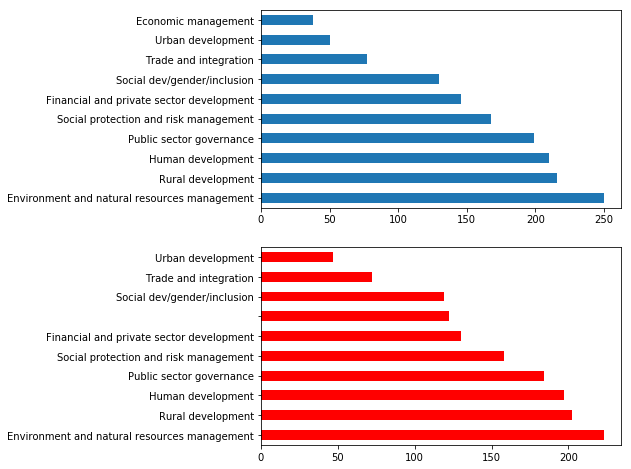

In [17]:
plt.figure(figsize=(5,8))

plt.subplot(2,1,1)
top_10_f.plot(kind='barh')
plt.subplots_adjust(left=0, right=1)

plt.subplot(2,1,2)
top_10_u.plot(kind='barh', color='r')
plt.subplots_adjust(wspace=8, left =0, right=1)